In [20]:
import json
from tqdm import tqdm
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ElT
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500


from pathlib import Path
import sys
sys.path.append("..")
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

df = pd.read_csv(Path('./writers.csv'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# 손쉬운 처리를 위해 타입을 바꿉니다
df["AnswerCount"] = df["AnswerCount"].fillna(-1)
df["AnswerCount"] = df["AnswerCount"].astype(int)
df["PostTypeId"] = df["PostTypeId"].astype(int)
df["Id"] = df["Id"].astype(int)
df.set_index("Id", inplace=True, drop=False)

# 포스트의 길이를 추가합니다.
df["full_text"] = df["Title"].str.cat(df["body_text"], sep=" ", na_rep="")
df["text_len"] = df["full_text"].str.len()

# 질문은 포스트 타입이 1입니다
df["is_question"] = df["PostTypeId"] == 1

In [22]:
import missingno as msno

<AxesSubplot:>

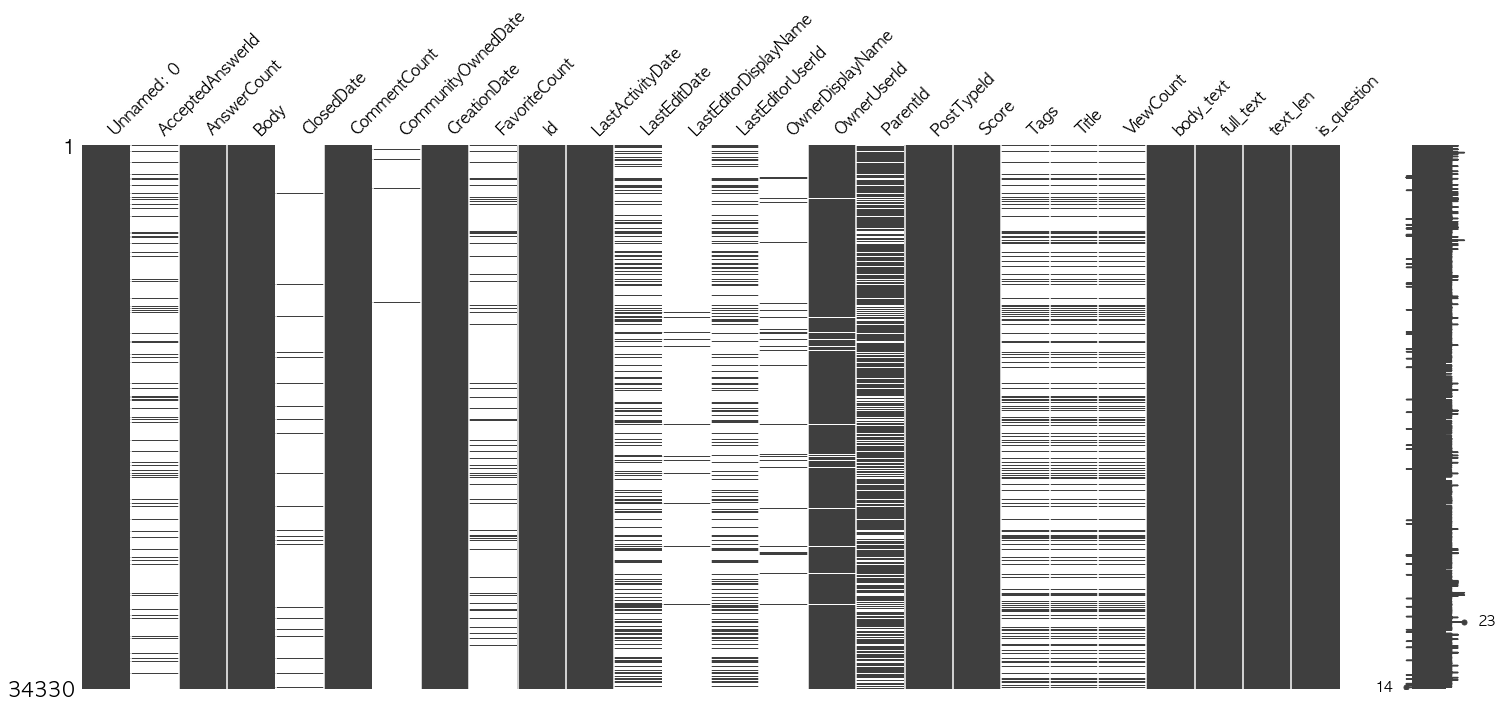

In [23]:
msno.matrix(df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34330 entries, 1 to 42885
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             34330 non-null  int64  
 1   AcceptedAnswerId       4124 non-null   float64
 2   AnswerCount            34330 non-null  int64  
 3   Body                   34256 non-null  object 
 4   ClosedDate             969 non-null    object 
 5   CommentCount           34330 non-null  int64  
 6   CommunityOwnedDate     186 non-null    object 
 7   CreationDate           34330 non-null  object 
 8   FavoriteCount          3307 non-null   float64
 9   Id                     34330 non-null  int64  
 10  LastActivityDate       34330 non-null  object 
 11  LastEditDate           11201 non-null  object 
 12  LastEditorDisplayName  614 non-null    object 
 13  LastEditorUserId       10648 non-null  float64
 14  OwnerDisplayName       1976 non-null   object 
 15  Ow

In [25]:
df[df['Body'].isna()]

,Unnamed: 0,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,LastActivityDate,LastEditDate,LastEditorDisplayName,LastEditorUserId,OwnerDisplayName,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount,body_text,full_text,text_len,is_question
Id,,,,,,,,,,,,,,,,,,,,,,,,,,
2145,1959,NaN,-1,NaN,NaN,0,NaN,2011-03-22T19:49:56.600,NaN,2145,2011-03-22T19:49:56.600,2011-03-22T19:49:56.600,NaN,20.0,NaN,20.0,NaN,5,0,NaN,NaN,NaN,NaN,,1,False
2147,1961,NaN,-1,NaN,NaN,0,NaN,2011-03-22T19:51:05.897,NaN,2147,2011-03-22T19:51:05.897,2011-03-22T19:51:05.897,NaN,20.0,NaN,20.0,NaN,5,0,NaN,NaN,NaN,NaN,,1,False
2215,2029,NaN,-1,NaN,NaN,0,NaN,2011-03-24T19:35:10.353,NaN,2215,2011-03-24T19:35:10.353,2011-03-24T19:35:10.353,NaN,-1.0,NaN,-1.0,NaN,5,0,NaN,NaN,NaN,NaN,,1,False
2218,2032,NaN,-1,NaN,NaN,0,NaN,2011-03-24T19:41:38.677,NaN,2218,2011-03-24T19:41:38.677,2011-03-24T19:41:38.677,NaN,-1.0,NaN,-1.0,NaN,5,0,NaN,NaN,NaN,NaN,,1,False
2225,2039,NaN,-1,NaN,NaN,0,NaN,2011-03-24T19:58:59.833,NaN,2225,2011-03-24T19:58:59.833,2011-03-24T19:58:59.833,NaN,-1.0,NaN,-1.0,NaN,5,0,NaN,NaN,NaN,NaN,,1,False
2227,2041,NaN,-1,NaN,NaN,0,NaN,2011-03-24T20:05:07.753,NaN,2227,2011-03-24T20:05:07.753,2011-03-24T20:05:07.753,NaN,-1.0,NaN,-1.0,NaN,5,0,NaN,NaN,NaN,NaN,,1,False
2233,2047,NaN,-1,NaN,NaN,0,NaN,2011-03-24T20:22:44.603,NaN,2233,2011-03-24T20:22:44.603,2011-03-24T20:22:44.603,NaN,-1.0,NaN,-1.0,NaN,5,0,NaN,NaN,NaN,NaN,,1,False
2238,2052,NaN,-1,NaN,NaN,0,NaN,2011-03-24T20:38:42.200,NaN,2238,2011-03-24T20:38:42.200,2011-03-24T20:38:42.200,NaN,-1.0,NaN,-1.0,NaN,5,0,NaN,NaN,NaN,NaN,,1,False
3138,2850,NaN,-1,NaN,NaN,0,NaN,2011-06-19T20:18:13.253,NaN,3138,2011-06-19T20:18:13.253,2011-06-19T20:18:13.253,NaN,-1.0,NaN,-1.0,NaN,5,0,NaN,NaN,NaN,NaN,,1,False


In [26]:
df = df[df['PostTypeId'].isin([1, 2])]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33650 entries, 1 to 42885
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             33650 non-null  int64  
 1   AcceptedAnswerId       4124 non-null   float64
 2   AnswerCount            33650 non-null  int64  
 3   Body                   33650 non-null  object 
 4   ClosedDate             969 non-null    object 
 5   CommentCount           33650 non-null  int64  
 6   CommunityOwnedDate     186 non-null    object 
 7   CreationDate           33650 non-null  object 
 8   FavoriteCount          3307 non-null   float64
 9   Id                     33650 non-null  int64  
 10  LastActivityDate       33650 non-null  object 
 11  LastEditDate           10521 non-null  object 
 12  LastEditorDisplayName  606 non-null    object 
 13  LastEditorUserId       9975 non-null   float64
 14  OwnerDisplayName       1971 non-null   object 
 15  Ow

<AxesSubplot:>

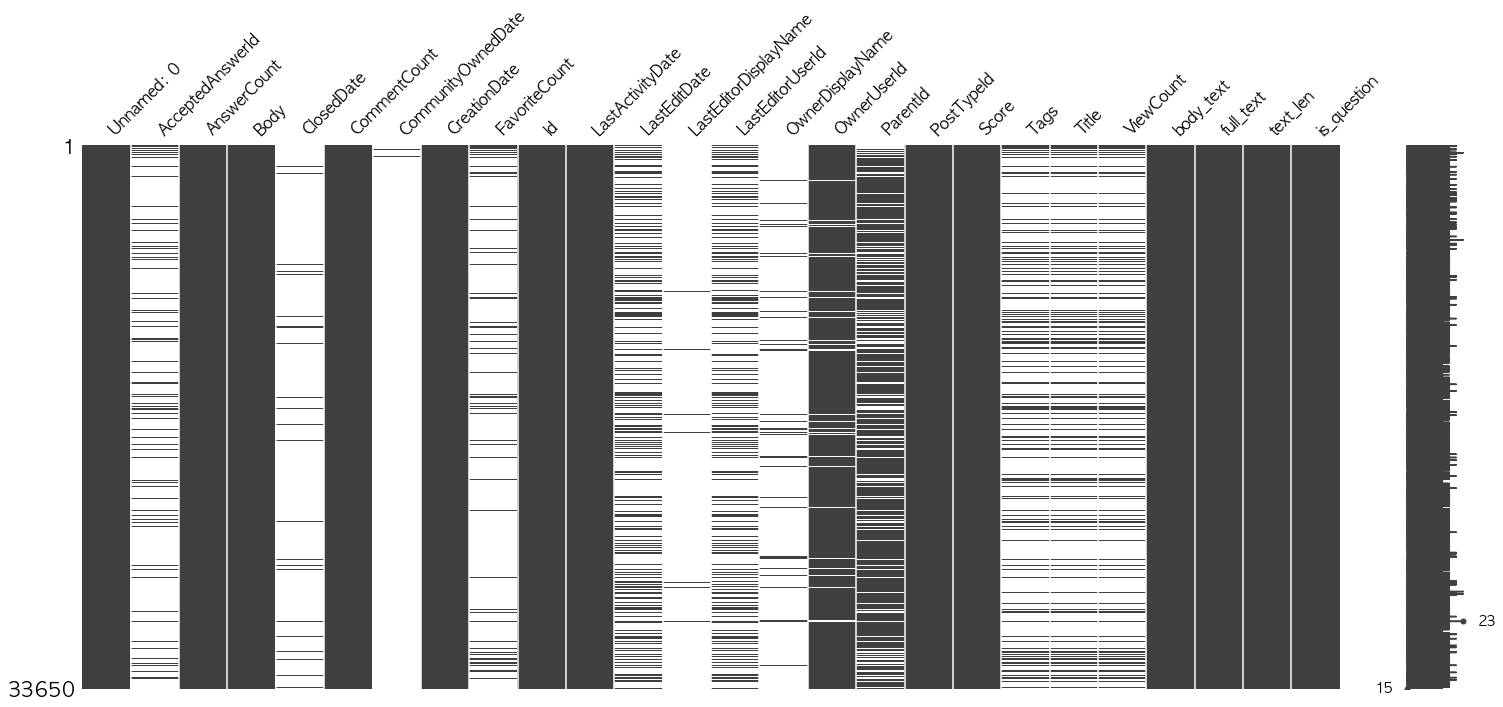

In [28]:
msno.matrix(df)

In [29]:
questions_with_accepted_answers = df[df["is_question"] & ~(df["AcceptedAnswerId"].isna())]
q_and_a = questions_with_accepted_answers.join(df[["body_text"]], on="AcceptedAnswerId", how="left", rsuffix="_answer")

In [30]:
q_and_a[['body_text', 'body_text_answer']][:3]

,body_text,body_text_answer
Id,,
1,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n","When I'm thinking about where I learned most how to write, I think that reading was the most important guide to me. This may sound silly, but by reading good written newspaper articles (facts, opinions, scientific articles and most of all, criticisms of films and music), I learned how others did the job, what works and what doesn't. In my own writing, I try to mimic other people's styles that I liked. Moreover, I learn new things by reading, giving me a broader background that I need when re..."
2,"What kind of story is better suited for each point of view? Are there advantages or disadvantages inherent to them?\nFor example, writing in the first person you are always following a character, while in the third person you can ""jump"" between story lines.\n","With a story in first person, you are intending the reader to become much more attached to the main character. Since the reader sees what that character sees and feels what that character feels, the reader will have an emotional investment in that character. Third person does not have this close tie; a reader can become emotionally invested but it will not be as strong as it will be in first person.\nContrarily, you cannot have multiple point characters when you use first person without ex..."
3,"I finished my novel, and everyone I've talked to says I need an agent. How do I find one?\n","Try and find a list of agents who write in your genre. Check out their websites!\nFind out if they are accepting new clients. If they aren't, then check out another agent. But if they are, try sending them a few chapters from your story, a brief, and a short cover letter asking them to represent you.\nIn the cover letter mention your previous publication credits. If sent via post, then I suggest you give them a means of reply, whether it be an email or a stamped, addressed envelope.\nAgents ..."


In [31]:
df = df.join(df[["Id", "Title", "body_text", "text_len", "Score", "AcceptedAnswerId"]], on="ParentId", how="left", rsuffix='_question')

In [32]:
df[df["Id_question"] ==1].head()

,Unnamed: 0,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,LastActivityDate,LastEditDate,LastEditorDisplayName,LastEditorUserId,OwnerDisplayName,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount,body_text,full_text,text_len,is_question,Id_question,Title_question,body_text_question,text_len_question,Score_question,AcceptedAnswerId_question
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,5,NaN,-1,"<p>BeginningWriters.com has some good articles for beginning writers.</p>\n\n<p><a href=""http://beginningwriters.com/"">http://beginningwriters.com/</a></p>\n",NaN,0,NaN,2010-11-18T20:45:45.533,NaN,8,2010-11-18T20:45:45.533,NaN,NaN,NaN,NaN,28.0,1.0,2,9,NaN,NaN,NaN,BeginningWriters.com has some good articles for beginning writers.\nhttp://beginningwriters.com/\n,BeginningWriters.com has some good articles for beginning writers.\nhttp://beginningwriters.com/\n,97,False,1.0,What are some online guides for starting writers?,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n",352.0,32.0,15.0
15,10,NaN,-1,"<p>When I'm thinking about where I learned most how to write, I think that <em>reading</em> was the most important guide to me. This may sound silly, but by reading good written newspaper articles (facts, opinions, scientific articles and most of all, criticisms of films and music), I learned how others did the job, what works and what doesn't. In my own writing, I try to mimic other people's styles that I liked. Moreover, I learn new things by reading, giving me a broader background that I ...",NaN,3,NaN,2010-11-18T20:50:16.683,NaN,15,2010-11-18T21:04:08.450,2010-11-18T21:04:08.450,NaN,23.0,NaN,23.0,1.0,2,15,NaN,NaN,NaN,"When I'm thinking about where I learned most how to write, I think that reading was the most important guide to me. This may sound silly, but by reading good written newspaper articles (facts, opinions, scientific articles and most of all, criticisms of films and music), I learned how others did the job, what works and what doesn't. In my own writing, I try to mimic other people's styles that I liked. Moreover, I learn new things by reading, giving me a broader background that I need when re...","When I'm thinking about where I learned most how to write, I think that reading was the most important guide to me. This may sound silly, but by reading good written newspaper articles (facts, opinions, scientific articles and most of all, criticisms of films and music), I learned how others did the job, what works and what doesn't. In my own writing, I try to mimic other people's styles that I liked. Moreover, I learn new things by reading, giving me a broader background that I need when r...",962,False,1.0,What are some online guides for starting writers?,"I've always wanted to start writing (in a totally amateur way), but whenever I want to start something I instantly get blocked having a lot of questions and doubts.\nAre there some resources on how to start becoming a writer?\nI'm thinking something with tips and easy exercises to get the ball rolling.\n",352.0,32.0,15.0
79,65,NaN,-1,"<p>I particularly like <a href=""http://www.advancedfictionwriting.com/art/snowflake.php"" rel=""nofollow"" rel=""nofollow"">The Snowflake Method</a> and most of what Randy writes, including his book.</p>\n",NaN,0,NaN,2010-11-18T23:19:33.157,NaN,79,2010-11-18T23:19:33.157,NaN,NaN,NaN,NaN,21.0,1.0,2,5,NaN,NaN,NaN,"I particularly like The Snowflake Method and most of what Randy writes, including his book.\n","I particularly like The Snowflake Method and most of what Randy writes, including his book.\n",93,False,1.0,What are some online guides for starting writers?,"I've always wanted to start writing (in a totally amateur way), but whenev

In [33]:

has_accepted_answer = df[df["is_question"] & ~(df["AcceptedAnswerId"].isna())]
received_answers = df[df["is_question"] & (df["AnswerCount"]!=0)]
no_answers = df[df["is_question"] & (df["AcceptedAnswerId"].isna()) & (df["AnswerCount"]==0)]

print("총 질문: %s개, 1개 이상의 답변을 가진 질문: %s개, 답변이 채택된 질문: %s개" % (
    len(df[df["is_question"]]),
    len(received_answers),
    len(has_accepted_answer)))

총 질문: 7971개, 1개 이상의 답변을 가진 질문: 7827개, 답변이 채택된 질문: 4124개


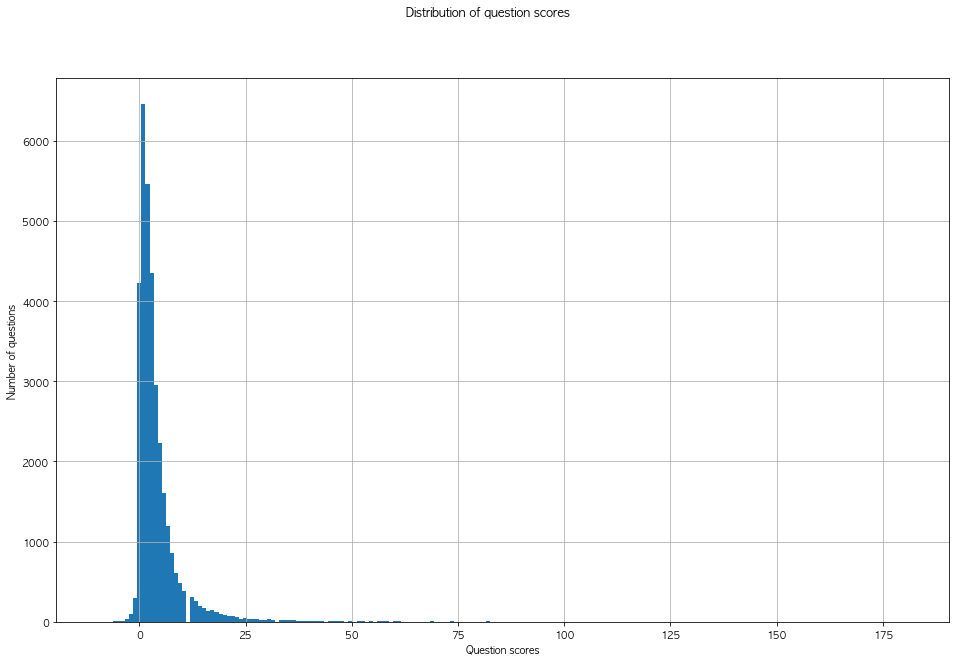

In [34]:
fig = plt.figure(figsize=(16,10))
fig.suptitle("Distribution of question scores")
plt.xlabel("Question scores")
plt.ylabel("Number of questions")
df["Score"].hist(bins=200);

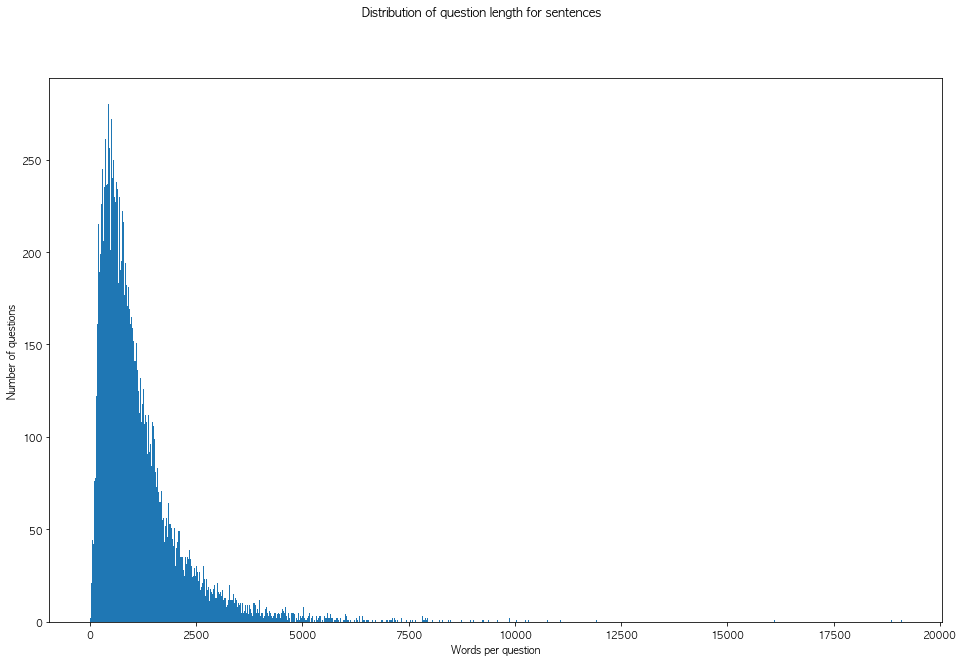

In [35]:
fig = plt.figure(figsize=(16,10))
fig.suptitle("Distribution of question length for sentences")
plt.xlabel("Words per question")
plt.ylabel("Number of questions")
q_len = plt.hist(df["text_len"],  bins=2000,log=False)

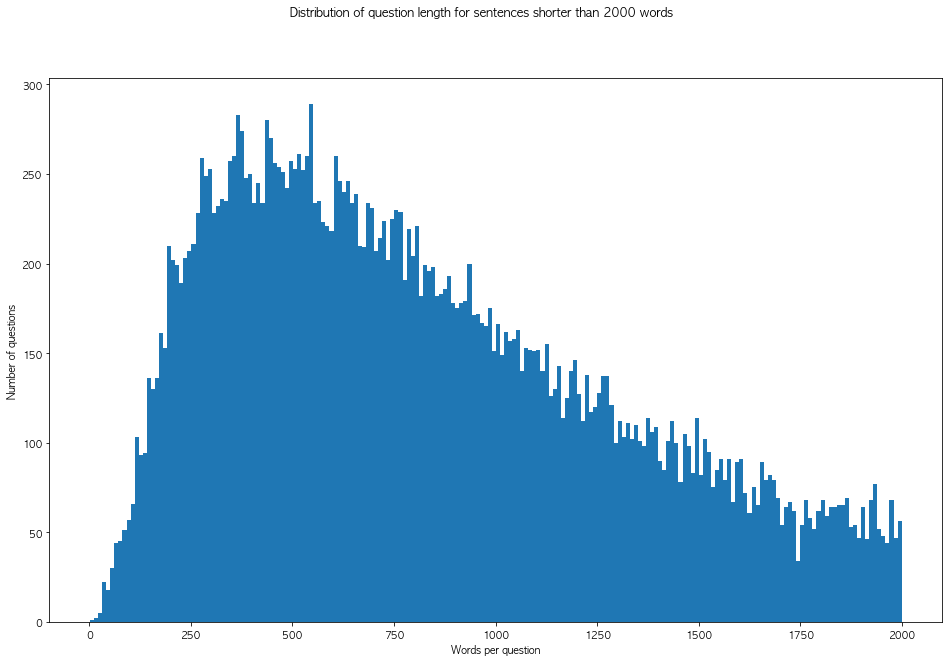

In [36]:
fig = plt.figure(figsize=(16,10))
fig.suptitle(
    "Distribution of question length for sentences shorter than 2000 words")
plt.xlabel("Words per question")
plt.ylabel("Number of questions")
q_len_trunc = plt.hist(df[df["text_len"]<2000]["text_len"], bins=200, log=False)

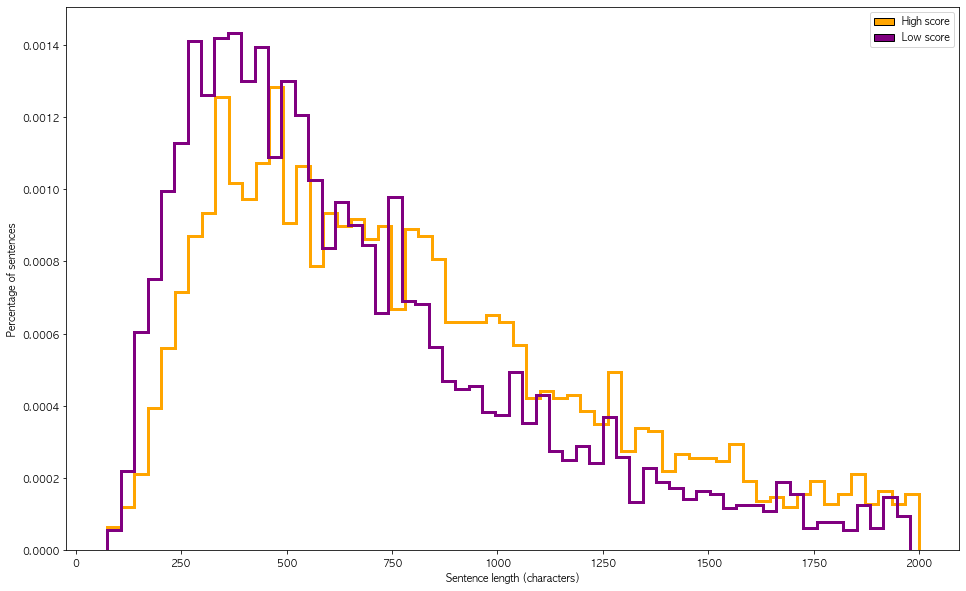

In [37]:
high_score = df["Score"] > df["Score"].median()
# 아주 긴 질문을 제외힙니다
normal_length = df["text_len"] < 2000

ax = df[df["is_question"] & high_score & normal_length]["text_len"].hist(
    bins=60,
    density=True,
    histtype="step",
    color="orange",
    linewidth=3,
    grid=False,
    figsize=(16, 10),
)

df[df["is_question"] & ~high_score & normal_length]["text_len"].hist(
    bins=60,
    density=True,
    histtype="step",
    color="purple",
    linewidth=3,
    grid=False,
)

handles = [
    Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ["orange", "purple"]
]
labels = ["High score", "Low score"]
plt.legend(handles, labels)
ax.set_xlabel("Sentence length (characters)")
ax.set_ylabel("Percentage of sentences");

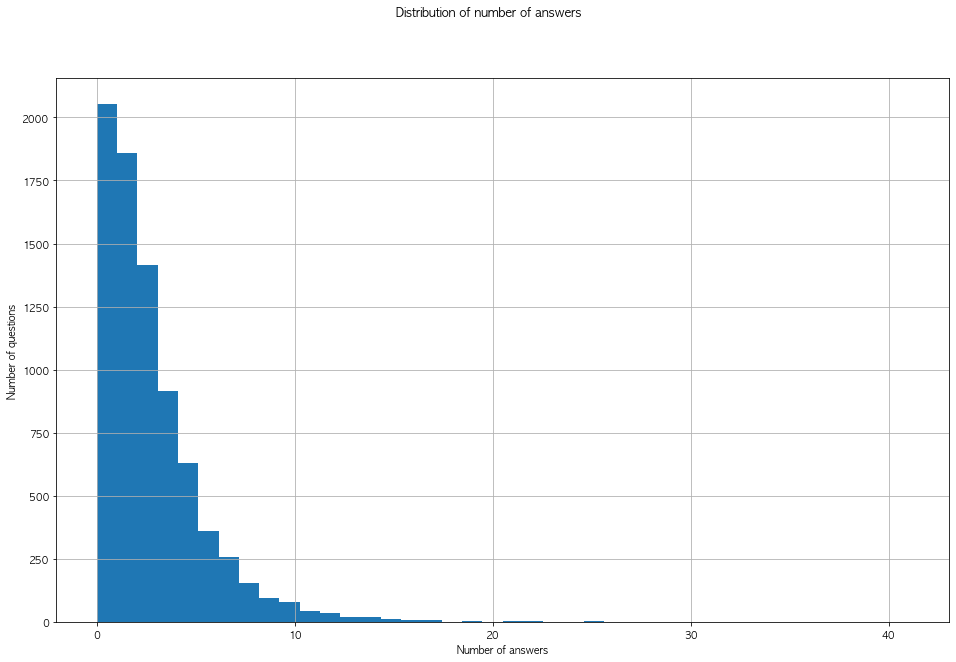

In [38]:

fig = plt.figure(figsize=(16,10))
fig.suptitle("Distribution of number of answers")
plt.xlabel("Number of answers")
plt.ylabel("Number of questions")
hist = df[df["is_question"]]["AnswerCount"].hist(bins=40)

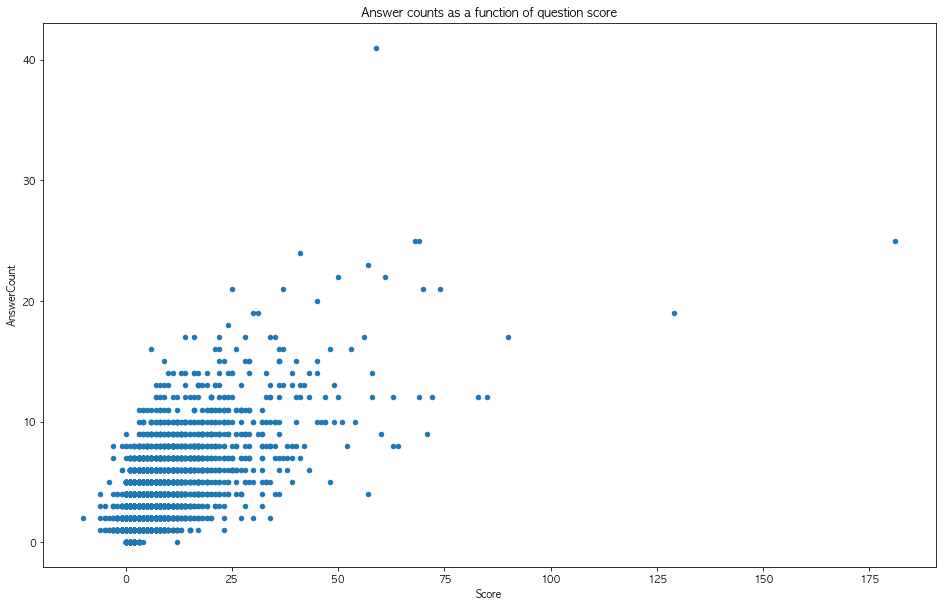

In [39]:
scatter = df[df["is_question"]][["Score", "AnswerCount"]].plot(x="Score", y="AnswerCount", 
                                                               kind="scatter",
                                                              figsize=(16, 10))
ax.set_xlabel("Score")
ax.set_ylabel("Num answers")
scatter.set_title("Answer counts as a function of question score");

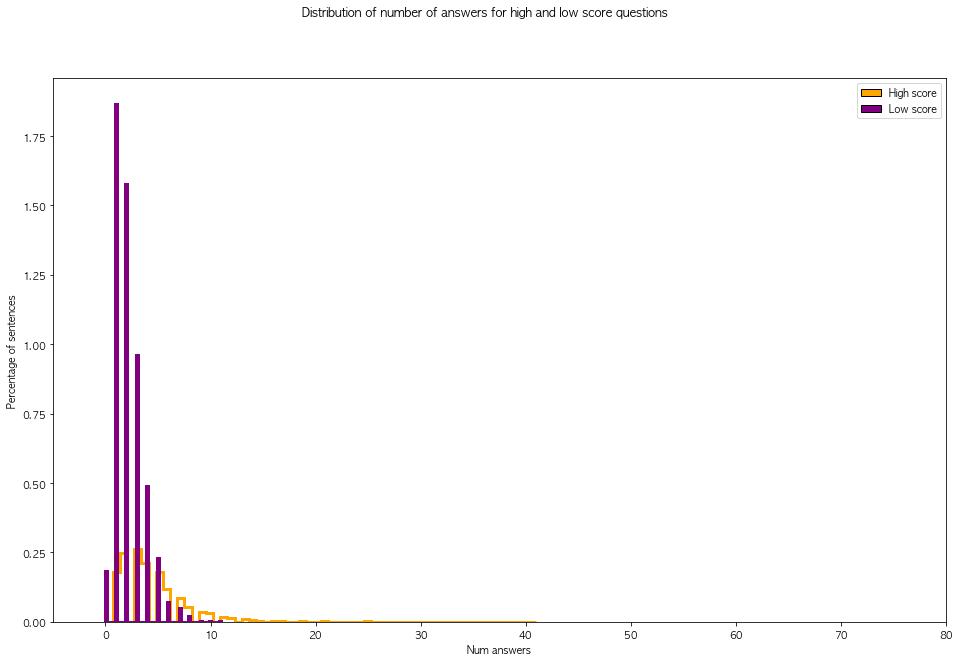

In [40]:
fig = plt.figure(figsize=(16,10))
fig.suptitle("Distribution of number of answers for high and low score questions")
plt.xlim(-5,80)

ax = df[df["is_question"] &
        (df["Score"] > df["Score"].median())]["AnswerCount"].hist(bins=60,
                                                          density=True,
                                                          histtype="step",
                                                          color="orange",
                                                          linewidth=3,
                                                          grid=False,
                                                          figsize=(16, 10))

df[df["is_question"] &
   ~(df["Score"] > df["Score"].median())]["AnswerCount"].hist(bins=60,
                                                     density=True,
                                                     histtype="step",
                                                     color="purple",
                                                     linewidth=3,
                                                     grid=False)

handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in
           ["orange", "purple"]]
labels = ["High score", "Low score"]
plt.legend(handles, labels)
ax.set_xlabel("Num answers")
ax.set_ylabel("Percentage of sentences");